In [1]:
import keras

Using TensorFlow backend.


## Import mnist data

In [2]:
from keras.datasets import mnist

In [3]:
# x : Image / y : label
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

## 데이터 보기

In [11]:
%matplotlib inline
from matplotlib import pyplot

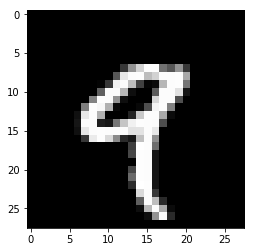

In [12]:
pyplot.imshow(x_train[4,], cmap='gray')

In [13]:
y_train[4,]

9

## 데이터 전처리

### Input

In [14]:
input_train = x_train.reshape(n_train, width*height)
input_train.shape

(60000, 784)

In [15]:
input_train.astype('float32')   # 데이터타입을 실수형으로 변환.

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [16]:
input_train = input_train / 255.0   # 원본 데이터는 0 ~ 255 색상값으로 되어 있기 때문에 0 ~ 1 범위로 변환.

In [17]:
input_train.max()

1.0

테스트용 데이터도 동일하게 처리

In [18]:
input_test = x_test.reshape(n_test, width*height)
input_test.astype('float32')
input_test = input_test / 255.0

### Output

In [19]:
output_train = keras.utils.to_categorical(y_train, 10) # 10자리의 리스트. 각 자리를 0 또는 1로 표시. one-hot encoding (dummy coding)
output_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [21]:
output_test = keras.utils.to_categorical(y_test, 10)

## Simple Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [23]:
model = Sequential()
model.add(Dense(392, activation='tanh', input_shape=(784,)))   # 입력층 784, 은닉층 392, 출력층 10 개 노드.
model.add(Dense(200, activation='tanh')
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 311,650.0
Trainable params: 311,650
Non-trainable params: 0.0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Model training

In [26]:
batch_size = 128
epochs = 1

In [27]:
history = model.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 11s - loss: 0.3335 - acc: 0.9029 - val_loss: 0.2162 - val_acc: 0.9348


In [29]:
history.history

{'acc': [0.90286666663487747],
 'loss': [0.33350437249342602],
 'val_acc': [0.93479999999999996],
 'val_loss': [0.21618224015235901]}

## Validation

In [28]:
score = model.evaluate(input_test, output_test, verbose=0)
score

[0.21618224172443151, 0.93479999999999996]